# Feature Expansion 
## Polynomials and Interactions

---

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (10,6)

#### Let's look again at the Anscombe dataset

In [14]:
df = sns.load_dataset('anscombe')

In [15]:
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


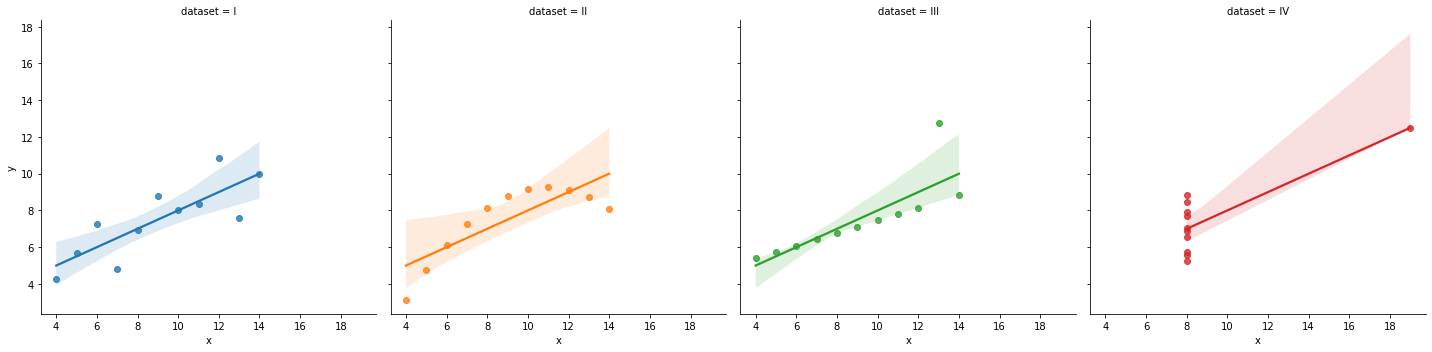

In [16]:
sns.lmplot(x='x',y='y',data=df,col='dataset',hue='dataset')

In [17]:
# check the statistsics of the different datasets
k = df.groupby('dataset').count()
k.head(2)

,x,y
dataset,,
I,11,11
II,11,11


#### Questions to reflect on the fitted models: 
- **Q1**: Check out the means of the different datasets
            Same values
- **Q2**: What does it mean to say "they are the same linear models"?
            Same intercept and slope
- **Q3** Are the models equally good to fit the data?
            No
- **Q4** Are there obvious ways to fix the models?
        Transform the dataset with a polynomial degree

#### ...and try to fix the model of second data set

In [18]:
df2 = df.loc[df['dataset']=='II',['x','y']]
df2

,x,y
11,10.0,9.14
12,8.0,8.14
13,13.0,8.74
14,9.0,8.77
15,11.0,9.26
16,14.0,8.10
17,6.0,6.13
18,4.0,3.10
19,12.0,9.13
20,7.0,7.26


<AxesSubplot:xlabel='x', ylabel='y'>

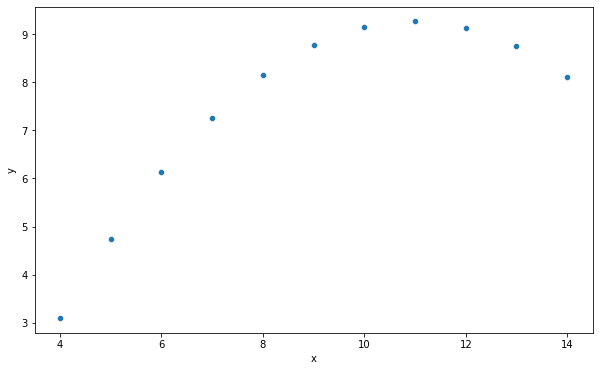

In [19]:
sns.scatterplot(x = df2['x'], y = df2['y'])

#### Save our X and y data

In [20]:
y = df2['y']
X = df2[['x']]
X

,x
11,10.0
12,8.0
13,13.0
14,9.0
15,11.0
16,14.0
17,6.0
18,4.0
19,12.0
20,7.0


### Fit a Linear Regression model

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
m = LinearRegression()

In [23]:
m.fit(X,y)

LinearRegression()

In [24]:
round(m.score(X,y),2)

0.67

In [25]:
y_pred = m.predict(X)


In [26]:
df2['y_pred'] = y_pred
df2

,x,y,y_pred
11,10.0,9.14,8.000909
12,8.0,8.14,7.000909
13,13.0,8.74,9.500909
14,9.0,8.77,7.500909
15,11.0,9.26,8.500909
16,14.0,8.10,10.000909
17,6.0,6.13,6.000909
18,4.0,3.10,5.000909
19,12.0,9.13,9.000909
20,7.0,7.26,6.500909


<AxesSubplot:xlabel='x', ylabel='y'>

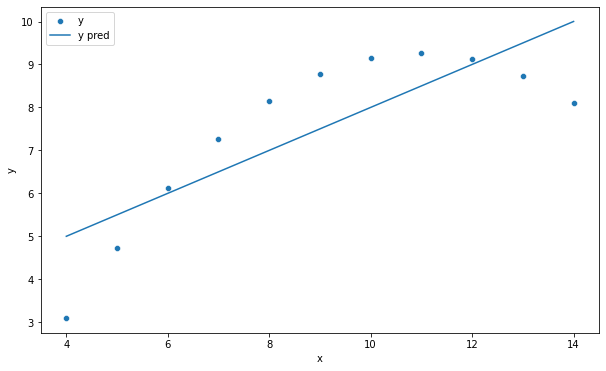

In [27]:
sns.scatterplot(data = df2, x = 'x', y = 'y', label = 'y')
sns.lineplot(data = df2, x = 'x', y = 'y_pred', label = 'y pred')

#### Now let's try to fix it by adding polynomials
- For our `x`, define `x^2`

## Polynomials

- Extra features that are **powers** of an existing feature.
- Sum of powers of x, multiplied by some coefficient

$$
a_0 * x^0 + a_1 * x^1 + a_2 * x^2 + ...
$$

- Might increase accuracy of your model 
- Also increase risk of over fitting

In [28]:
X['x^2'] = X['x']**2

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
X.head()

,x,x^2
11,10.0,100.0
12,8.0,64.0
13,13.0,169.0
14,9.0,81.0
15,11.0,121.0


### Let's fit again with both features

In [30]:
m.fit(X,y)

LinearRegression()

In [31]:
y_pred_poly = m.predict(X)

In [32]:
m.score(X,y)

0.999999457857722

In [33]:
df2['y_pred_poly'] = y_pred_poly

<AxesSubplot:xlabel='x', ylabel='y'>

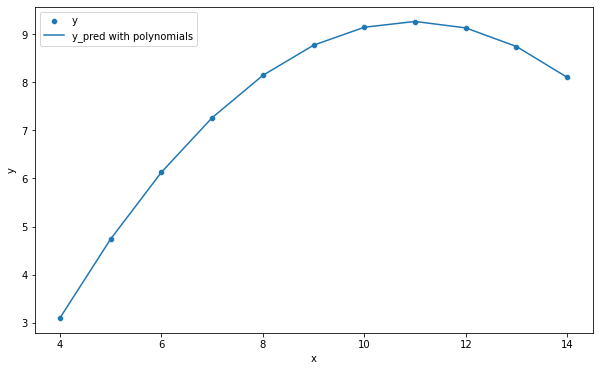

In [34]:
sns.scatterplot(x = df2['x'], y = df2['y'], label = 'y')
sns.lineplot(x = df2['x'], y = df2['y_pred_poly'], label = 'y_pred with polynomials' )

In [35]:
m.score(X,y)

0.999999457857722

---

#### As usual ...this is something Sklearn can do for us

## Polynomial Features with Sklearn 

In [36]:
from sklearn.preprocessing import PolynomialFeatures

##### Create a polynomial feature transformer, specify the degrees

In [65]:
pt = PolynomialFeatures(degree= 3, include_bias= False,interaction_only=False)

In [66]:
X.columns = ['x','y']


In [67]:
X

,x,y
11,10.0,100.0
12,8.0,64.0
13,13.0,169.0
14,9.0,81.0
15,11.0,121.0
16,14.0,196.0
17,6.0,36.0
18,4.0,16.0
19,12.0,144.0
20,7.0,49.0


In [68]:
pd.DataFrame(pt.fit_transform(X))

,0,1,2,3,4,5,6,7,8
0,10.0,100.0,100.0,1000.0,10000.0,1000.0,10000.0,100000.0,1000000.0
1,8.0,64.0,64.0,512.0,4096.0,512.0,4096.0,32768.0,262144.0
2,13.0,169.0,169.0,2197.0,28561.0,2197.0,28561.0,371293.0,4826809.0
3,9.0,81.0,81.0,729.0,6561.0,729.0,6561.0,59049.0,531441.0
4,11.0,121.0,121.0,1331.0,14641.0,1331.0,14641.0,161051.0,1771561.0
5,14.0,196.0,196.0,2744.0,38416.0,2744.0,38416.0,537824.0,7529536.0
6,6.0,36.0,36.0,216.0,1296.0,216.0,1296.0,7776.0,46656.0
7,4.0,16.0,16.0,64.0,256.0,64.0,256.0,1024.0,4096.0
8,12.0,144.0,144.0,1728.0,20736.0,1728.0,20736.0,248832.0,2985984.0
9,7.0,49.0,49.0,343.0,2401.0,343.0,2401.0,16807.0,117649.0


In [74]:
pt.get_feature_names()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2', 'x1^3']

In [56]:
pt.get_feature_names()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [89]:
pt.fit(X[['x']])

PolynomialFeatures(include_bias=False)

In [90]:
p_features = pt.transform(X[['x']])

In [91]:
p_features

array([[ 10., 100.],
       [  8.,  64.],
       [ 13., 169.],
       [  9.,  81.],
       [ 11., 121.],
       [ 14., 196.],
       [  6.,  36.],
       [  4.,  16.],
       [ 12., 144.],
       [  7.,  49.],
       [  5.,  25.]])

In [92]:
pt.get_feature_names()

/home/arjun/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x0^2']

##### Fit transform the data in question, and look at it in a DF with column names

In [ ]:
pd.DataFrame(p_features, columns=pt.get_feature_names())

---

# Interaction terms
* If our X data has 2 features, x1 and x2, then a 2 degree polynomial result would take the form:
* $1, x1, x2, x1^2, x1*x2, x2^2$
* Each of these get their own coefficient
* We can use the polynomial preprocessing function, but set interaction_only=True

In [93]:
X

,x,x^2
11,10.0,100.0
12,8.0,64.0
13,13.0,169.0
14,9.0,81.0
15,11.0,121.0
16,14.0,196.0
17,6.0,36.0
18,4.0,16.0
19,12.0,144.0
20,7.0,49.0


In [95]:
PolynomialFeatures()

PolynomialFeatures()

In [96]:
pt = PolynomialFeatures(interaction_only=True, include_bias= False)
p_features = pt.fit_transform(X)
pd.DataFrame(p_features, columns=pt.get_feature_names())

/home/arjun/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0,x1,x0 x1
0,10.0,100.0,1000.0
1,8.0,64.0,512.0
2,13.0,169.0,2197.0
3,9.0,81.0,729.0
4,11.0,121.0,1331.0
5,14.0,196.0,2744.0
6,6.0,36.0,216.0
7,4.0,16.0,64.0
8,12.0,144.0,1728.0
9,7.0,49.0,343.0


---